In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
DATA = r"C:\Users\Hipor\projects\practical-statistics-for-data-scientists\data"
LOANS_INCOME_CSV = DATA + '\loans_income.csv'
SP500_DATA_CSV = DATA + '\sp500_data.csv.gz'

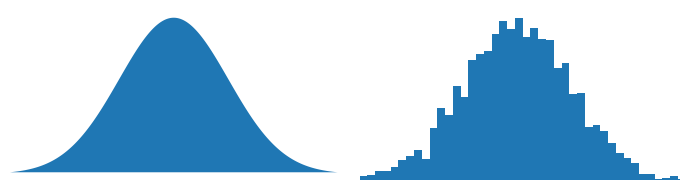

In [3]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=3000)

fig, axes = plt.subplots(ncols=2, figsize=(7, 2))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax2 = axes[1]
ax2.hist(xsample, bins=50)
ax2.set_axis_off()
ax2.set_xlim(-3, 3)
#ax.set_position


plt.tight_layout()
plt.show()

In [4]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

sample_data = pd.DataFrame({'income': loans_income.sample(1000),
                            'type': 'Data',})

sample_mean_05 = pd.DataFrame({'income' : [loans_income.sample(5).mean() for _ in range(1000)],
                               'type': 'Mean of 5',})

sample_mean_20 = pd.DataFrame({'income' : [loans_income.sample(20).mean() for _ in range(1000)],
                               'type': 'Mean of 20',})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])


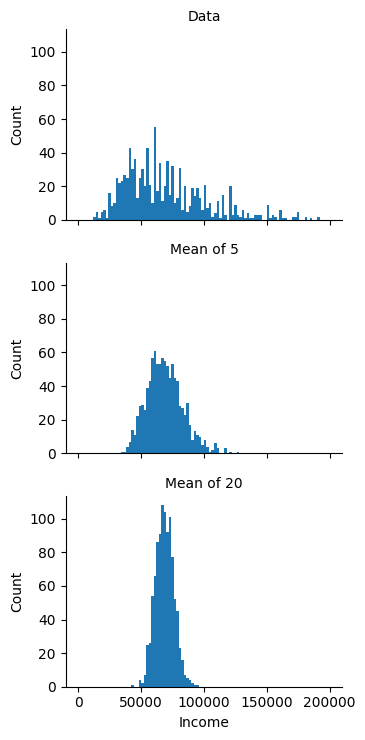

In [5]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2.5, aspect=1.5)
g.map(plt.hist, 'income', range=[0, 200000], bins=100)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

Bootstrap Statistics:
original: 62000.0
bias: -231.6553500000009
std. error: 584.2003951997573
61768.34465


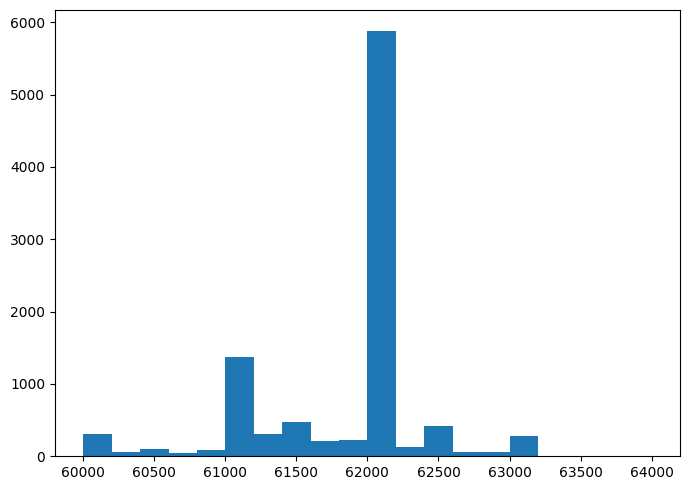

In [6]:
results = []
for _ in range(10000):
    sample = resample(loans_income, n_samples=10000)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')
print(results.mean())
plt.figure(figsize=(7,5))

ax = plt.hist(results, bins=20)

plt.tight_layout()
plt.show()

68760.51844
55734.1


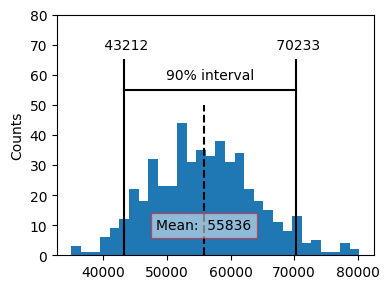

In [7]:
print(loans_income.mean())
np.random.seed(seed=3)
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for _ in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)
confidence_interval = list(results.quantile([0.05,0.95]))
ax = results.plot.hist(bins=30, figsize=(4,3))
ax.plot(confidence_interval, [55,55], color='black')
for x in confidence_interval:
    ax.plot([x,x], [0,65], color='black')
    ax.text(x,70, f'{x: .0f}', horizontalalignment='center',verticalalignment='center')
ax.text(sum(confidence_interval)/2, 60, '90% interval',
         horizontalalignment='center',verticalalignment='center')
meanIncome = results.mean()
ax.plot([meanIncome,meanIncome],[0,50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome: .0f}',
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='white', edgecolor='red', alpha=0.5))
ax.set_ylim(0,80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

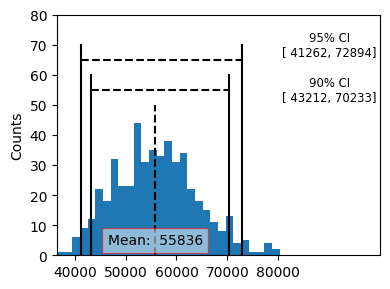

In [8]:
np.random.seed(seed=3)
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for _ in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)
confidence_interval = list(results.quantile([0.05,0.95]))
confidence_interval2 = list(results.quantile([0.025,0.975]))
ax = results.plot.hist(bins=30, figsize=(4,3))
ax.plot(confidence_interval, [55,55], color='black', linestyle='--')
ax.plot(confidence_interval2, [65,65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x,x], [0,60], color='black')
for x in confidence_interval2:
    ax.plot([x,x], [0,70], color='black')    

meanIncome = results.mean()
ax.plot([meanIncome,meanIncome],[0,50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome: .0f}',
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='white', edgecolor='red', alpha=0.5))

ax.text(9e4,70,f'95% CI\n[{confidence_interval2[0]: .0f},{confidence_interval2[1]: .0f}]',
        verticalalignment='center', horizontalalignment='center', fontsize='small')
ax.text(9e4,55,f'90% CI\n[{confidence_interval[0]: .0f},{confidence_interval[1]: .0f}]',
        verticalalignment='center', horizontalalignment='center', fontsize='small')

ax.set_ylim(0,80)
ax.set_ylabel('Counts')

ax.set_xlim(3.65e4,10e4)
ax.set_xticks([4e4,5e4,6e4,7e4,8e4])
plt.tight_layout()
plt.show()

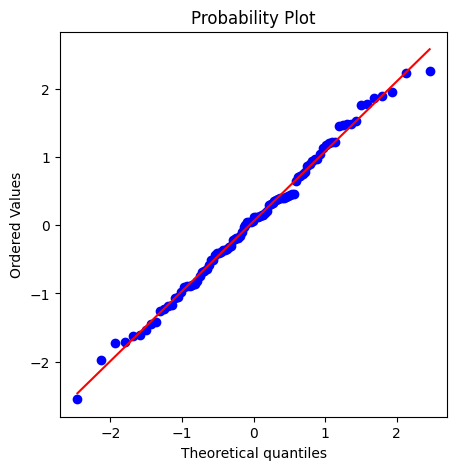

In [23]:
plt.figure(figsize=(5,5))

norm_sample = stats.norm.rvs(size=100, random_state=0)
stats.probplot(norm_sample, dist='norm', plot=plt)

plt.show()

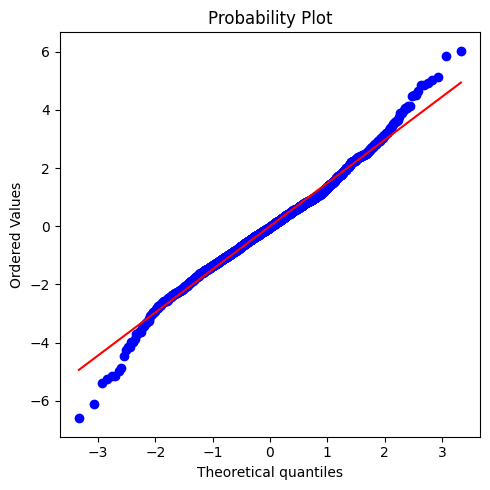

In [29]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx > 0]))

plt.figure(figsize=(5, 5))
stats.probplot(nflx, plot=plt)

plt.tight_layout()
plt.show()

In [30]:
print(stats.binom.pmf(2, n=5, p=0.1))
print(stats.binom.cdf(2, n=5, p=0.1))

0.07289999999999992
0.99144


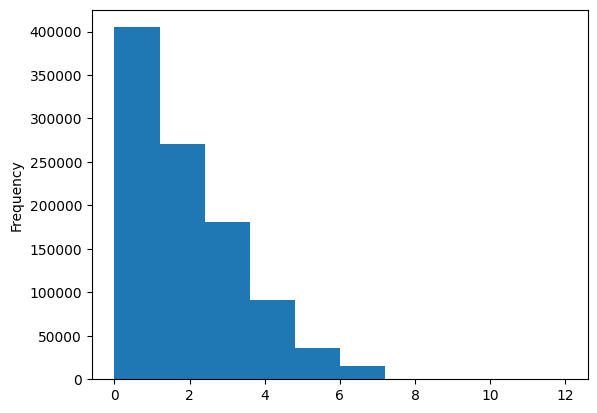

In [36]:
sample = stats.poisson.rvs(2, size=1000000)

pd.Series(sample).plot.hist(bins=10)
plt.show()

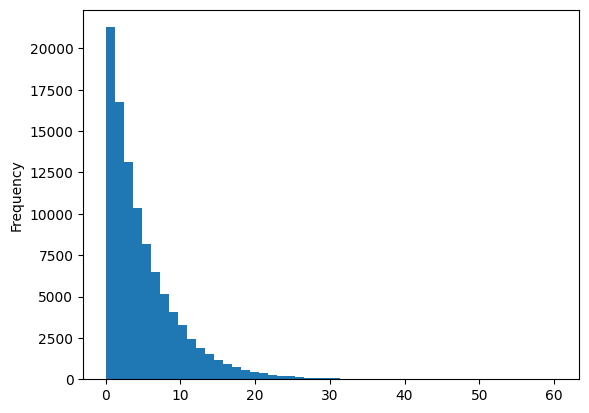

In [39]:
sample = stats.expon.rvs(scale=5, size=100000)

pd.Series(sample).plot.hist(bins=50)
plt.show()

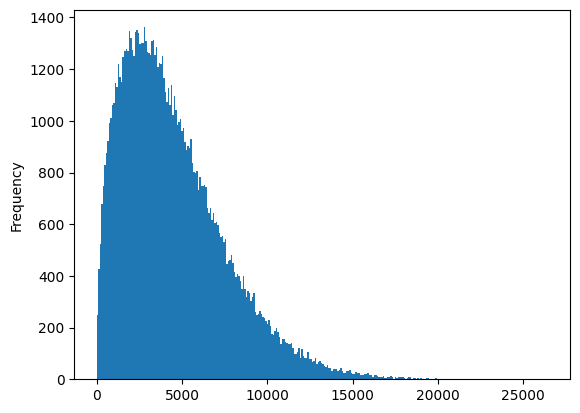

In [44]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100000)

pd.Series(sample).plot.hist(bins=300)
plt.show()